# Exploring Singapore HDB Resale Flat Prices between Jan 2017 to Sep 2023

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [2]:
# loading the dataset
df = pd.read_csv("Resale Flat Prices (Jan 17-Sep 23).csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
167653,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0
167654,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0
167655,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,63 years 02 months,780000.0
167656,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167658 entries, 0 to 167657
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                167658 non-null  object 
 1   town                 167658 non-null  object 
 2   flat_type            167658 non-null  object 
 3   block                167658 non-null  object 
 4   street_name          167658 non-null  object 
 5   storey_range         167658 non-null  object 
 6   floor_area_sqm       167658 non-null  float64
 7   flat_model           167658 non-null  object 
 8   lease_commence_date  167658 non-null  int64  
 9   remaining_lease      167658 non-null  object 
 10  resale_price         167658 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.1+ MB


In [4]:
unique_towns = df['town'].unique()
unique_towns

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [5]:
# creating new columns: month and year, and reindexing them.
df[['year', 'month']] = df['month'].str.split('-', expand = True)
df = df.reindex(columns = ['year', 'month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price'])
df

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017,01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017,01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017,01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017,01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017,01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
167653,2023,05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0
167654,2023,07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0
167655,2023,12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,63 years 02 months,780000.0
167656,2023,01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0


/Users/jerralcyj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


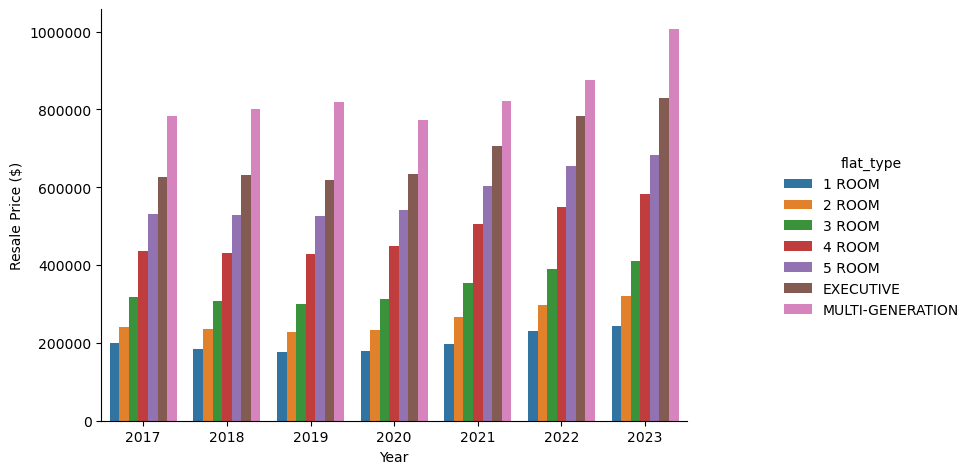

In [6]:
df['flat_type'] = pd.Categorical(df['flat_type'], categories = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
plot = sns.catplot(x = 'year', y  = 'resale_price', hue = 'flat_type', kind = 'bar', data = df, errorbar = None)
plot.fig.set_size_inches(10,5)
plot.set_xlabels('Year')
plot.set_ylabels('Resale Price ($)')
plt.ticklabel_format(style = 'plain', axis = 'y')

In [7]:
#calculating the LATEST AVERAGE PRICE 
#creating a new df dedicated to average price, town and lat + long
data = []
def average_price():
    town = df.drop_duplicates(subset = 'town')
    for i in town['town']:
            resale_average = df.loc[df['town'] == str(i)]
            resale_mean = resale_average['resale_price'].mean()
            resale_final = round(resale_mean,1)
            final = [resale_final,i]
            data.append(final)
    return data

In [ ]:
# creating a new dataframe with town coordinates

coord = {
    'Town': [
        'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG',
        'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG',
        'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS',
        'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
        'TOA PAYOH', 'WOODLANDS', 'YISHUN'
    ],
    'Latitude': [
        1.3699, 1.3236, 1.3515, 1.3496, 1.2829, 1.3780, 1.3547, 1.2867, 1.3893, 1.3151,
        1.3182, 1.3713, 1.3331, 1.3396, 1.3122, 1.3020, 1.3730, 1.4052, 1.2942, 1.4491,
        1.3917, 1.3632, 1.3546, 1.3354, 1.4361, 1.4304
    ],
    'Longitude': [
        103.8463, 103.9273, 103.8480, 103.7520, 103.8178, 103.7644, 103.7764, 103.8501,
        103.7437, 103.7657, 103.8878, 103.8916, 103.7427, 103.7073, 103.8629, 103.9073,
        103.9493, 103.9023, 103.7852, 103.8201, 103.8954, 103.8749, 103.9437, 103.8497,
        103.7868, 103.8354
    ]
}

# Creating a DataFrame from the data
coordinates = pd.DataFrame(coord)

# Displaying the DataFrame
coordinates

In [ ]:
map_df = pd.merge(coordinates, avg_price, on = 'Town', how = 'inner')

In [ ]:
map_df

In [ ]:
# Create a map centered on coordinates
sg_map = folium.Map(location = [map_df['Latitude'].mean(), map_df['Longitude'].mean()], zoom_start = 12)

# Add markers for each coordinate
for index, row in map_df.iterrows():
    popup_text = f"{row['Town']} Avg Price: ${row['Avg Price']:,}"
    folium.Marker(
        location = [row['Latitude'], row['Longitude']], 
        popup = folium.Popup(popup_text, parse_html = True)).add_to(sg_map)

# Display the map
sg_map